### Library and Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
x = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)


{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [ ]:
#General and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Machine Learning Model and Splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, f1_score

### Data Understanding

In [ ]:
df = pd.concat([x,y], axis = 1)

In [ ]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6137,1,38.200000,0,0.0,24,1282.953333,0.034783,0.049565,0.000,0.0,Nov,2,2,4,1,Returning_Visitor,True,False
2106,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000,0.0,May,1,1,1,6,Returning_Visitor,False,False
5264,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000,0.8,May,3,2,1,13,Returning_Visitor,False,False
3369,8,102.666667,0,0.0,49,4051.375000,0.007273,0.022949,0.000,0.0,May,2,4,7,4,Returning_Visitor,False,False
4124,0,0.000000,0,0.0,10,338.500000,0.000000,0.020000,32.382,0.0,May,2,2,2,1,Returning_Visitor,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

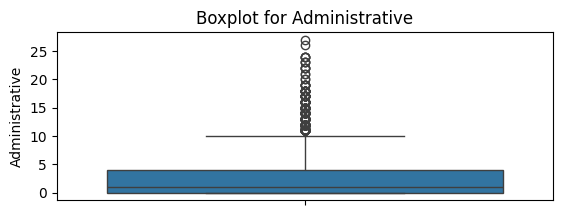

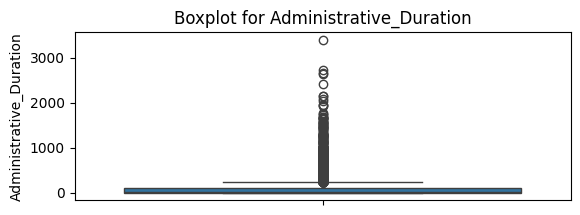

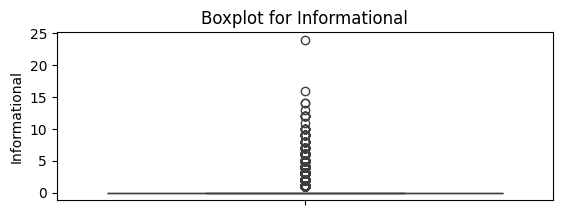

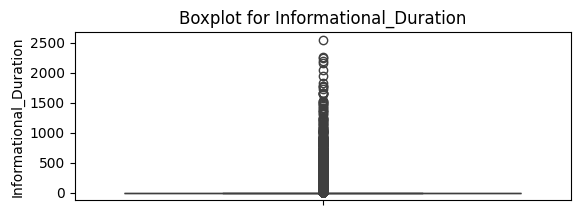

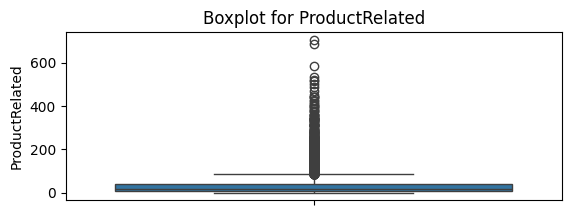

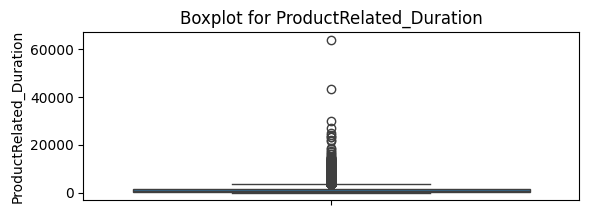

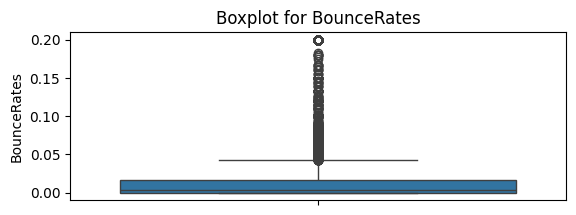

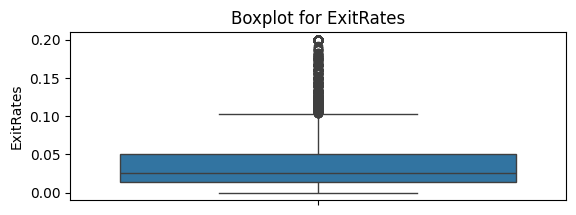

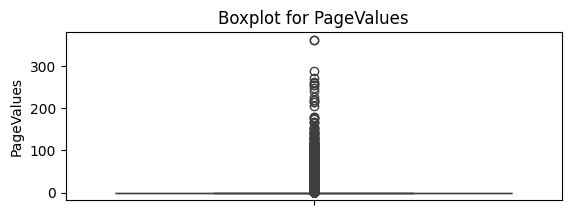

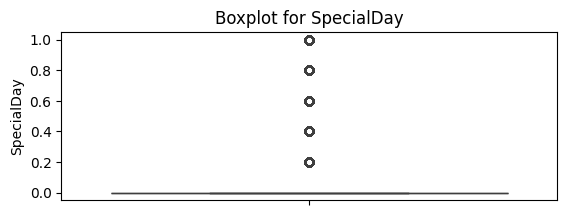

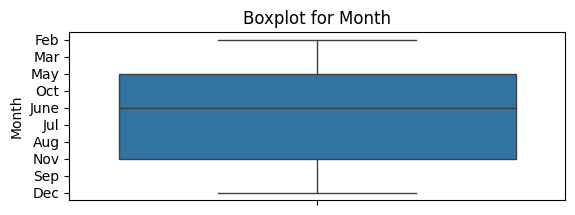

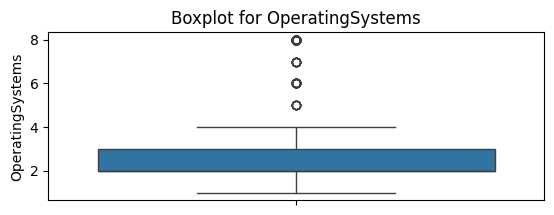

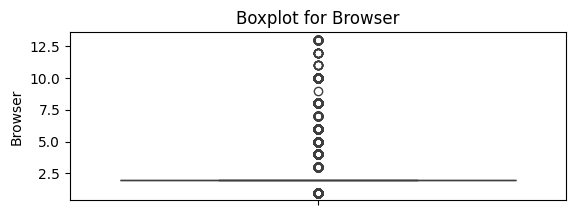

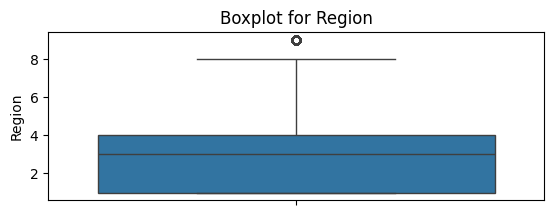

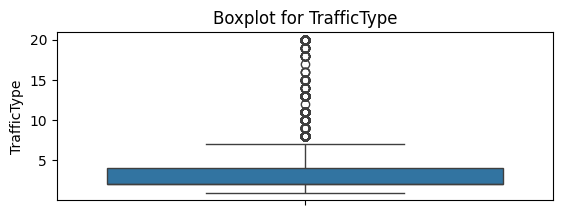

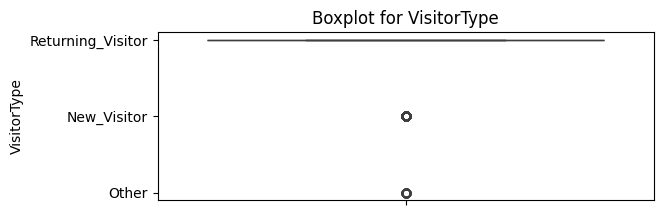

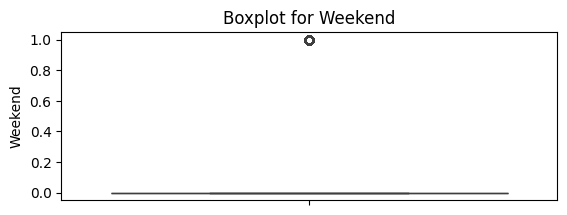

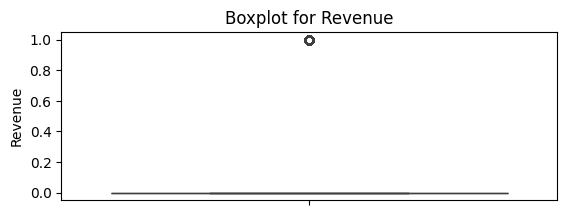

In [ ]:
for column in df:
  plt.subplot(2,1,1)
  sns.boxplot(df[column])
  plt.title(f"Boxplot for {column}")
  plt.show()

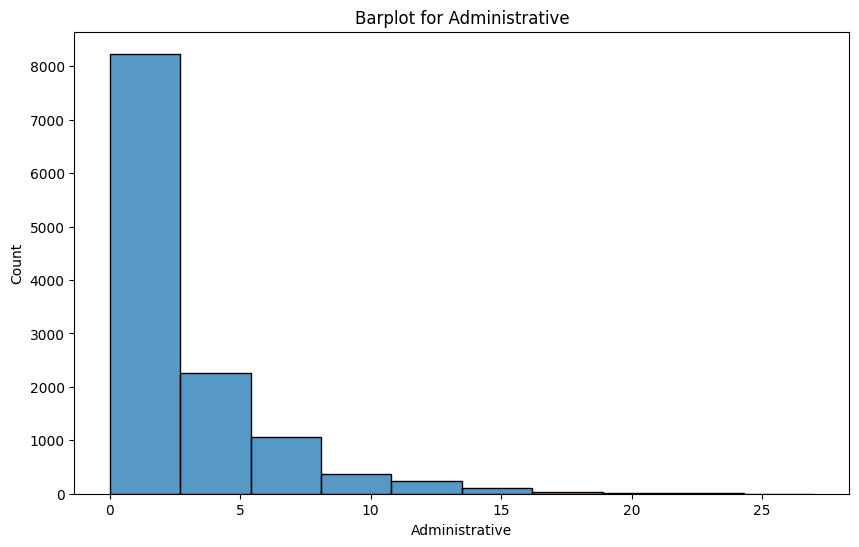

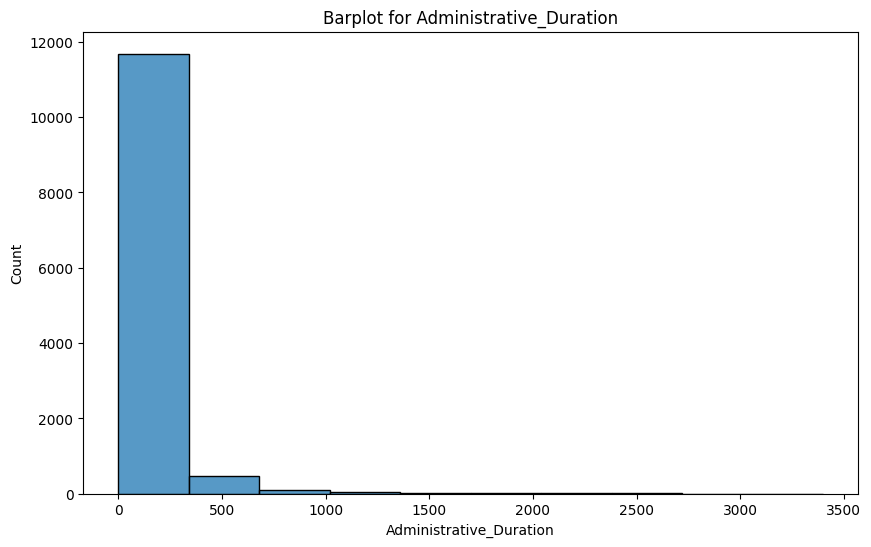

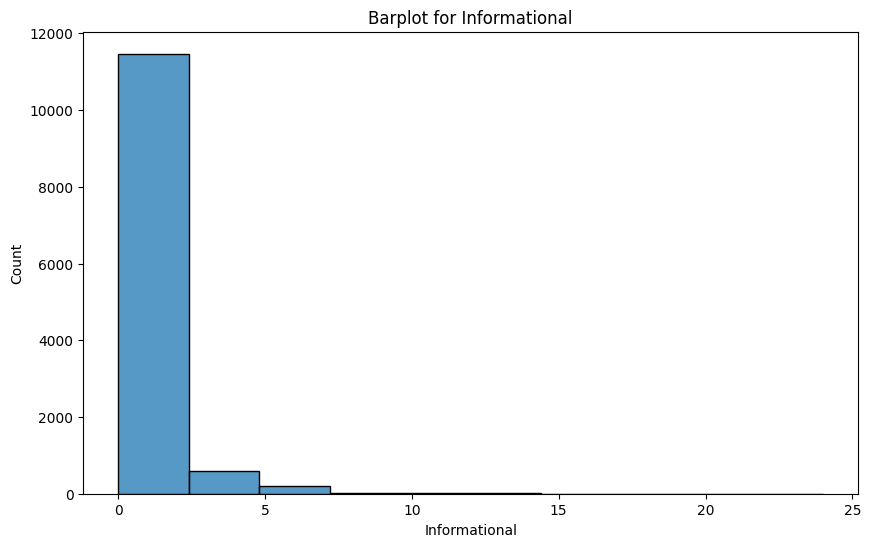

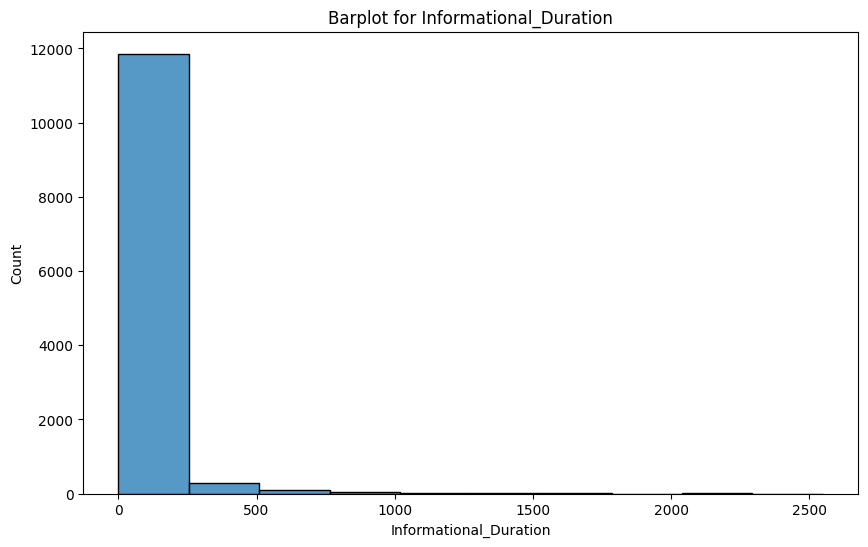

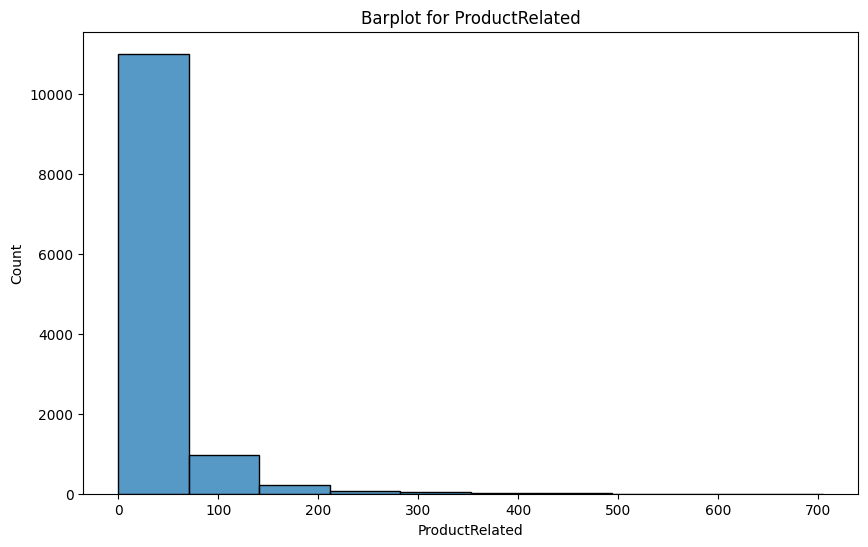

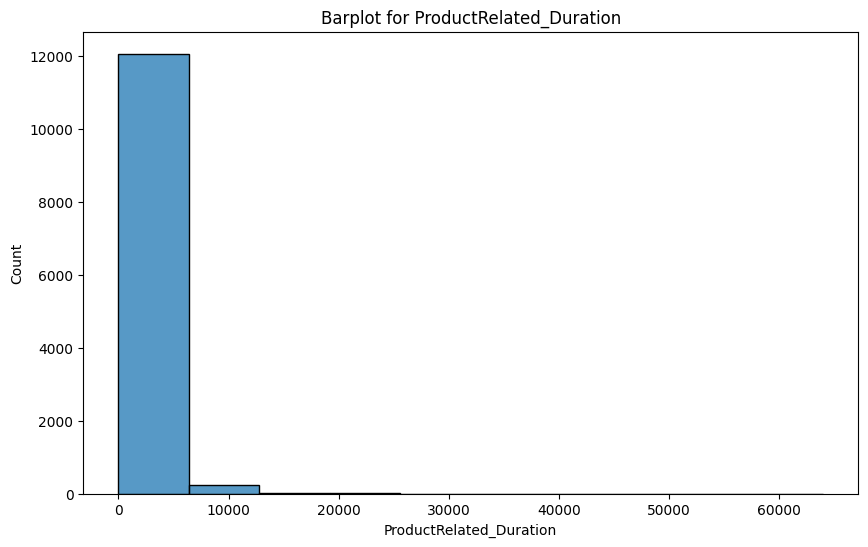

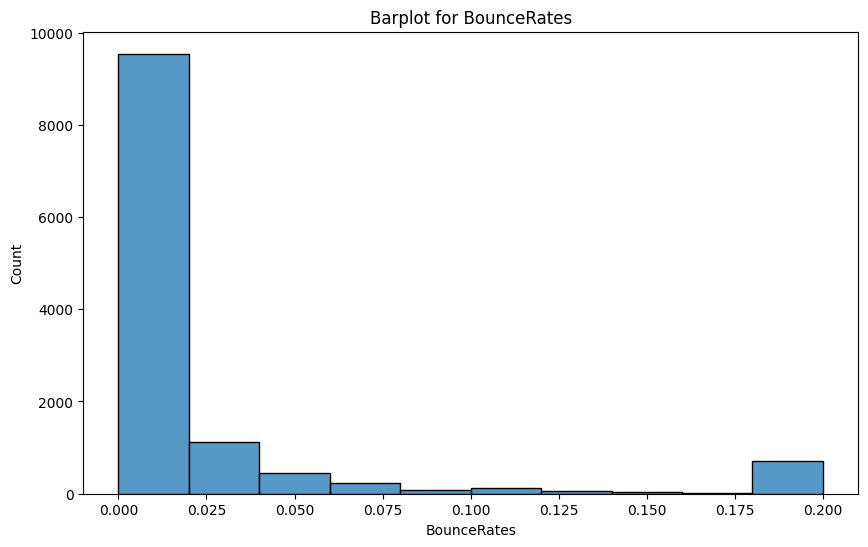

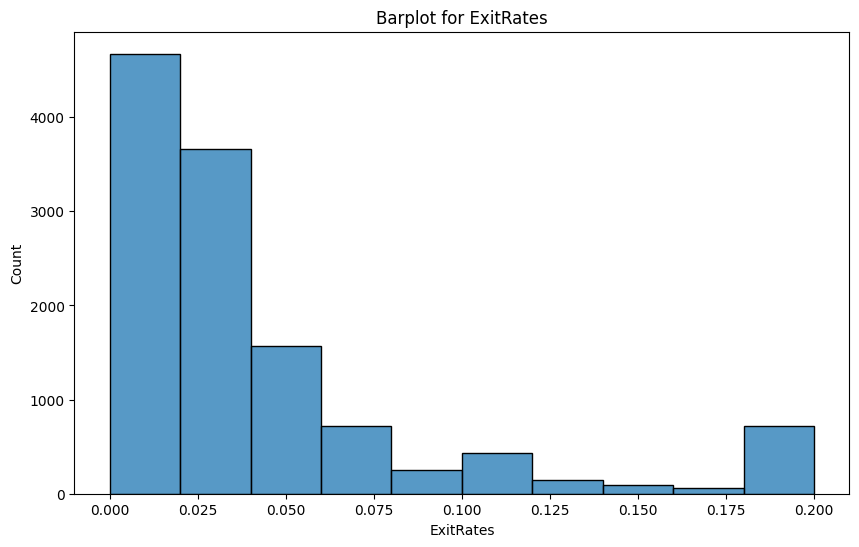

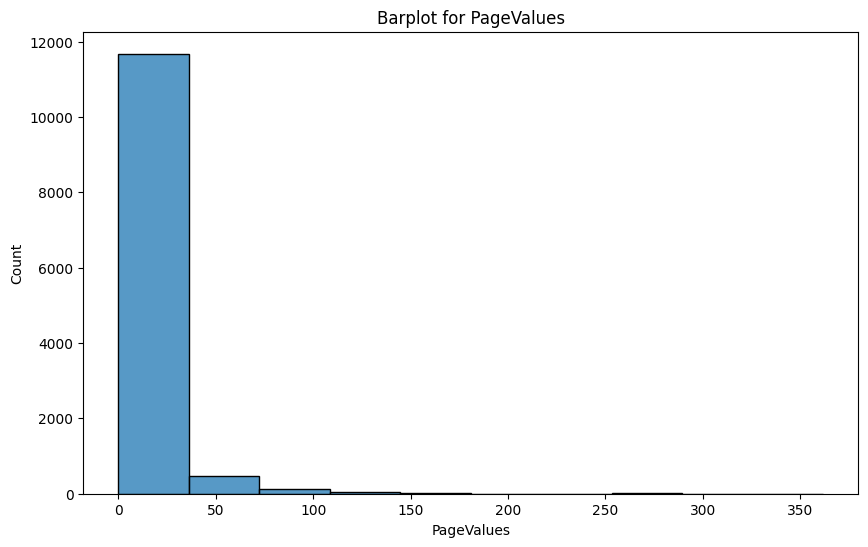

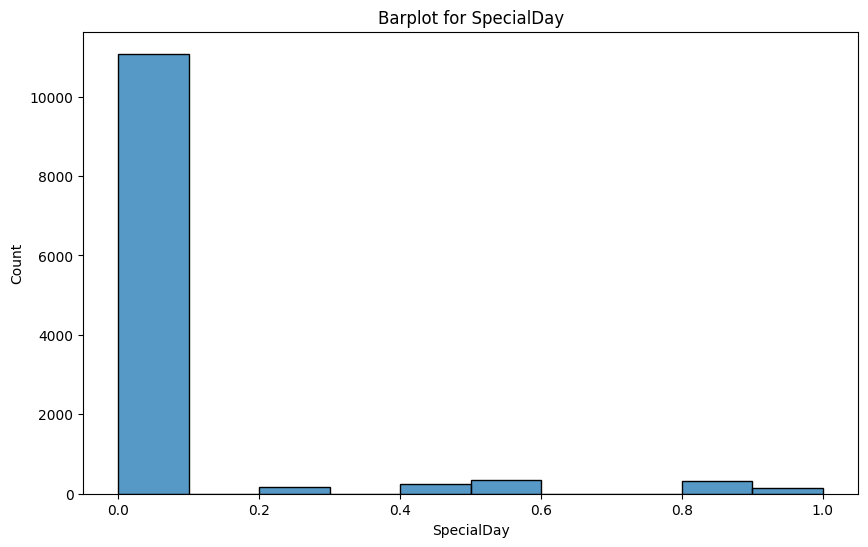

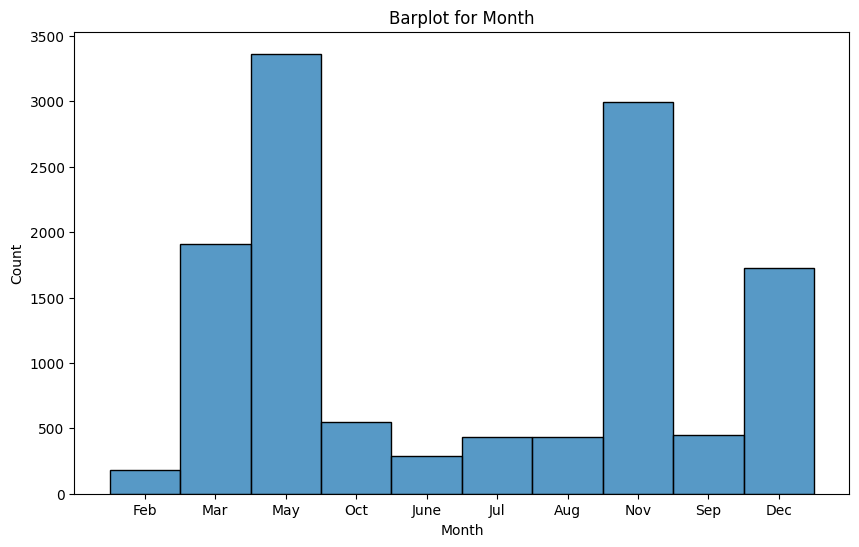

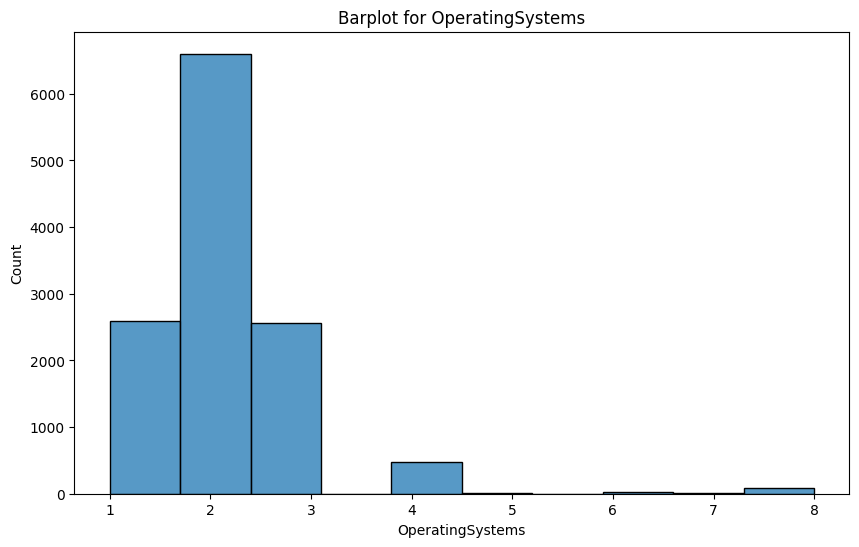

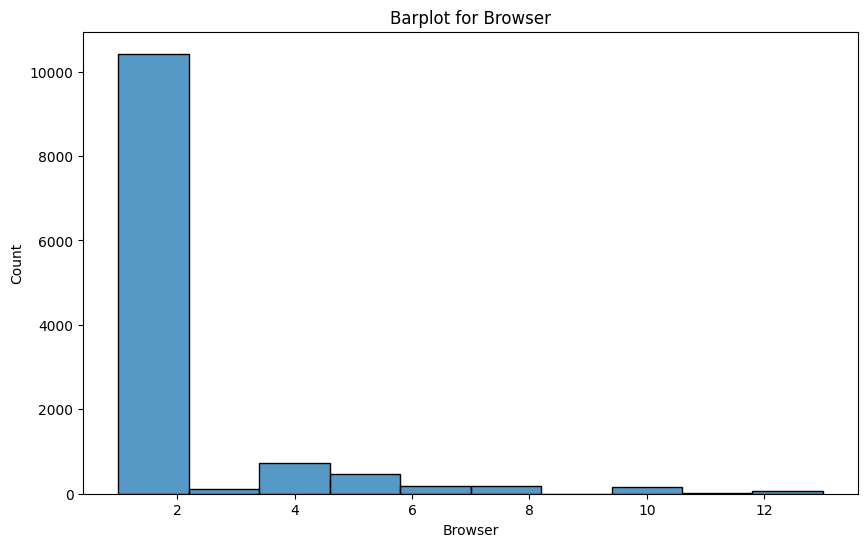

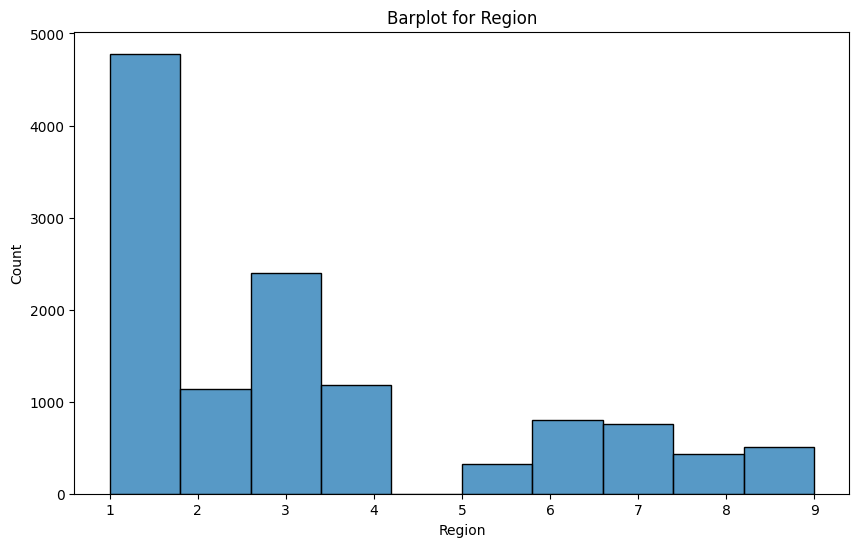

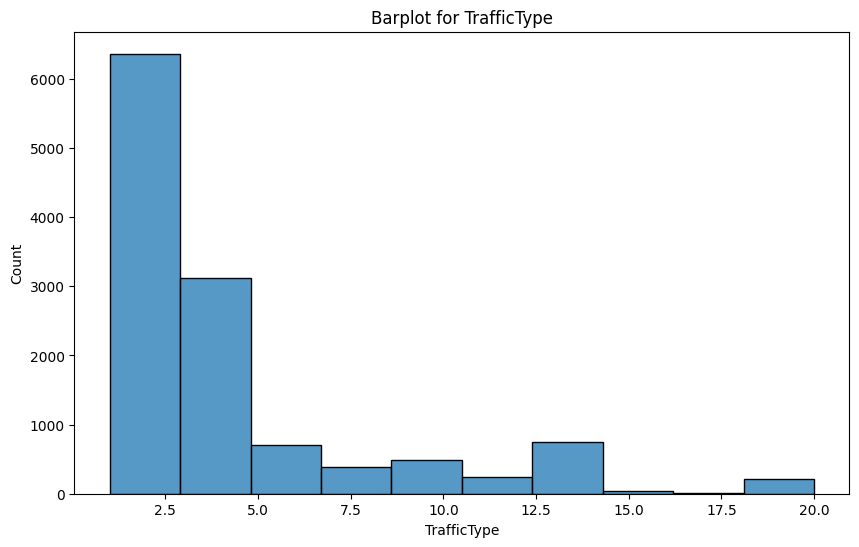

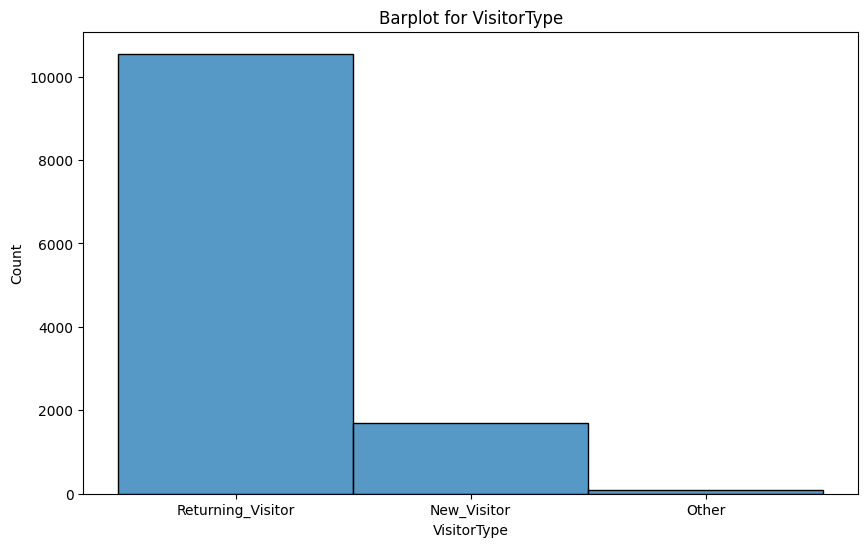

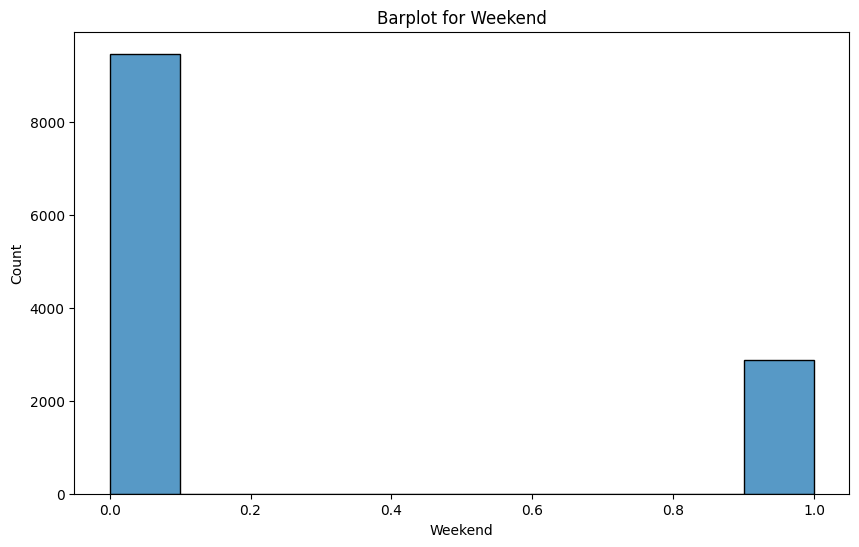

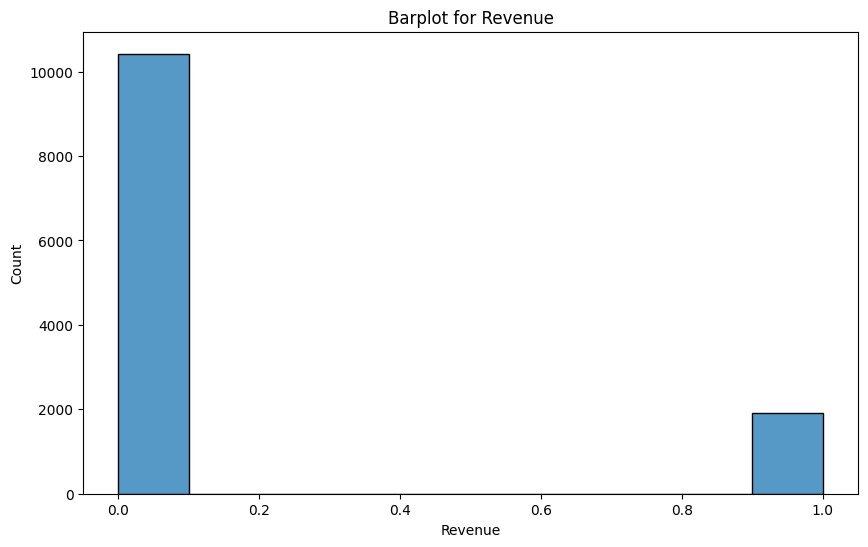

In [ ]:
for column in df:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=10, kde=False)
    plt.title(f"Barplot for {column}")
    plt.show()

### Data Preprocessing

<Axes: xlabel='Revenue'>

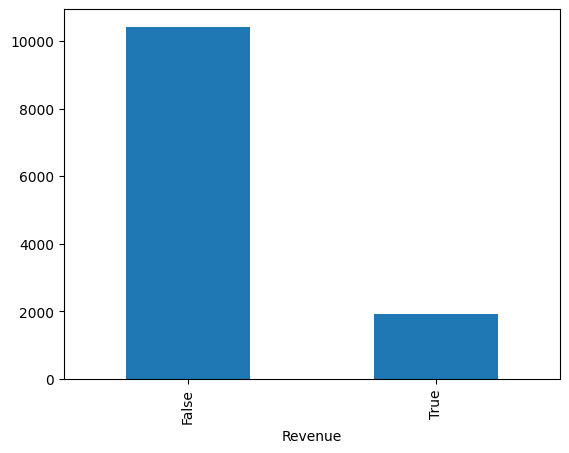

In [ ]:
df.Revenue.value_counts().plot.bar()

<Axes: xlabel='VisitorType'>

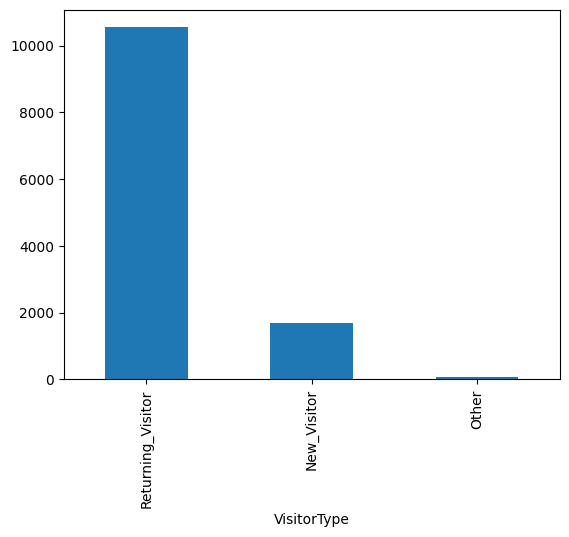

In [ ]:
df.VisitorType.value_counts().plot.bar()

<Axes: xlabel='Weekend'>

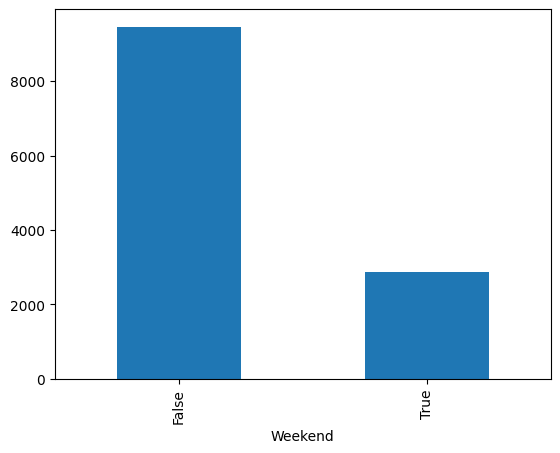

In [ ]:
df.Weekend.value_counts().plot.bar()

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Visitor Type

In [ ]:
exp_df = df

In [ ]:
exp_df = exp_df[exp_df['VisitorType'] != 'Other']

#### Month

In [ ]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
def intMonth(Month):
  if(Month == 'Jan'):
    return 1
  elif(Month == 'Feb'):
    return 2
  elif(Month == 'Mar'):
    return 3
  elif(Month == 'Apr'):
    return 4
  elif(Month == 'May'):
    return 5
  elif(Month == 'June'):
    return 6
  elif(Month == 'Jul'):
    return 7
  elif(Month == 'Aug'):
    return 8
  elif(Month == 'Sep'):
    return 9
  elif(Month == 'Oct'):
    return 10
  elif(Month == 'Nov'):
    return 11
  elif(Month == 'Dec'):
    return 12

In [ ]:
exp_df['Month'] = exp_df['Month'].apply(intMonth)

<ipython-input-18-385bacaefd52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['Month'] = exp_df['Month'].apply(intMonth)


#### Visitor Type

In [ ]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
def Visitor(visit):
  if(visit == 'Returning_Visitor'):
    return 0
  else:
    return 1

In [ ]:
exp_df['VisitorType'] = exp_df['VisitorType'].apply(Visitor)

<ipython-input-21-48df8610dbd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['VisitorType'] = exp_df['VisitorType'].apply(Visitor)


#### Weekend and Revenue

In [ ]:
df['Weekend'].unique()

array([False,  True])

In [ ]:
df['Revenue'].unique()

array([False,  True])

In [ ]:
def Encoder(x):
  if(x == True):
    return 1
  else:
    return 0

In [ ]:
exp_df['Weekend'] = exp_df['Weekend'].apply(Encoder)
exp_df['Revenue'] = exp_df['Revenue'].apply(Encoder)

<ipython-input-25-cc1befde4d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['Weekend'] = exp_df['Weekend'].apply(Encoder)
<ipython-input-25-cc1befde4d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['Revenue'] = exp_df['Revenue'].apply(Encoder)


In [ ]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12245 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  Month                    12245 non-null  int64  
 11  OperatingSystems         12245 non-null  int64  
 12  Browser                  12245 non-null  int64  
 13  Region                   12245 non-null  int64  
 14  TrafficType              12

### Data Visualization

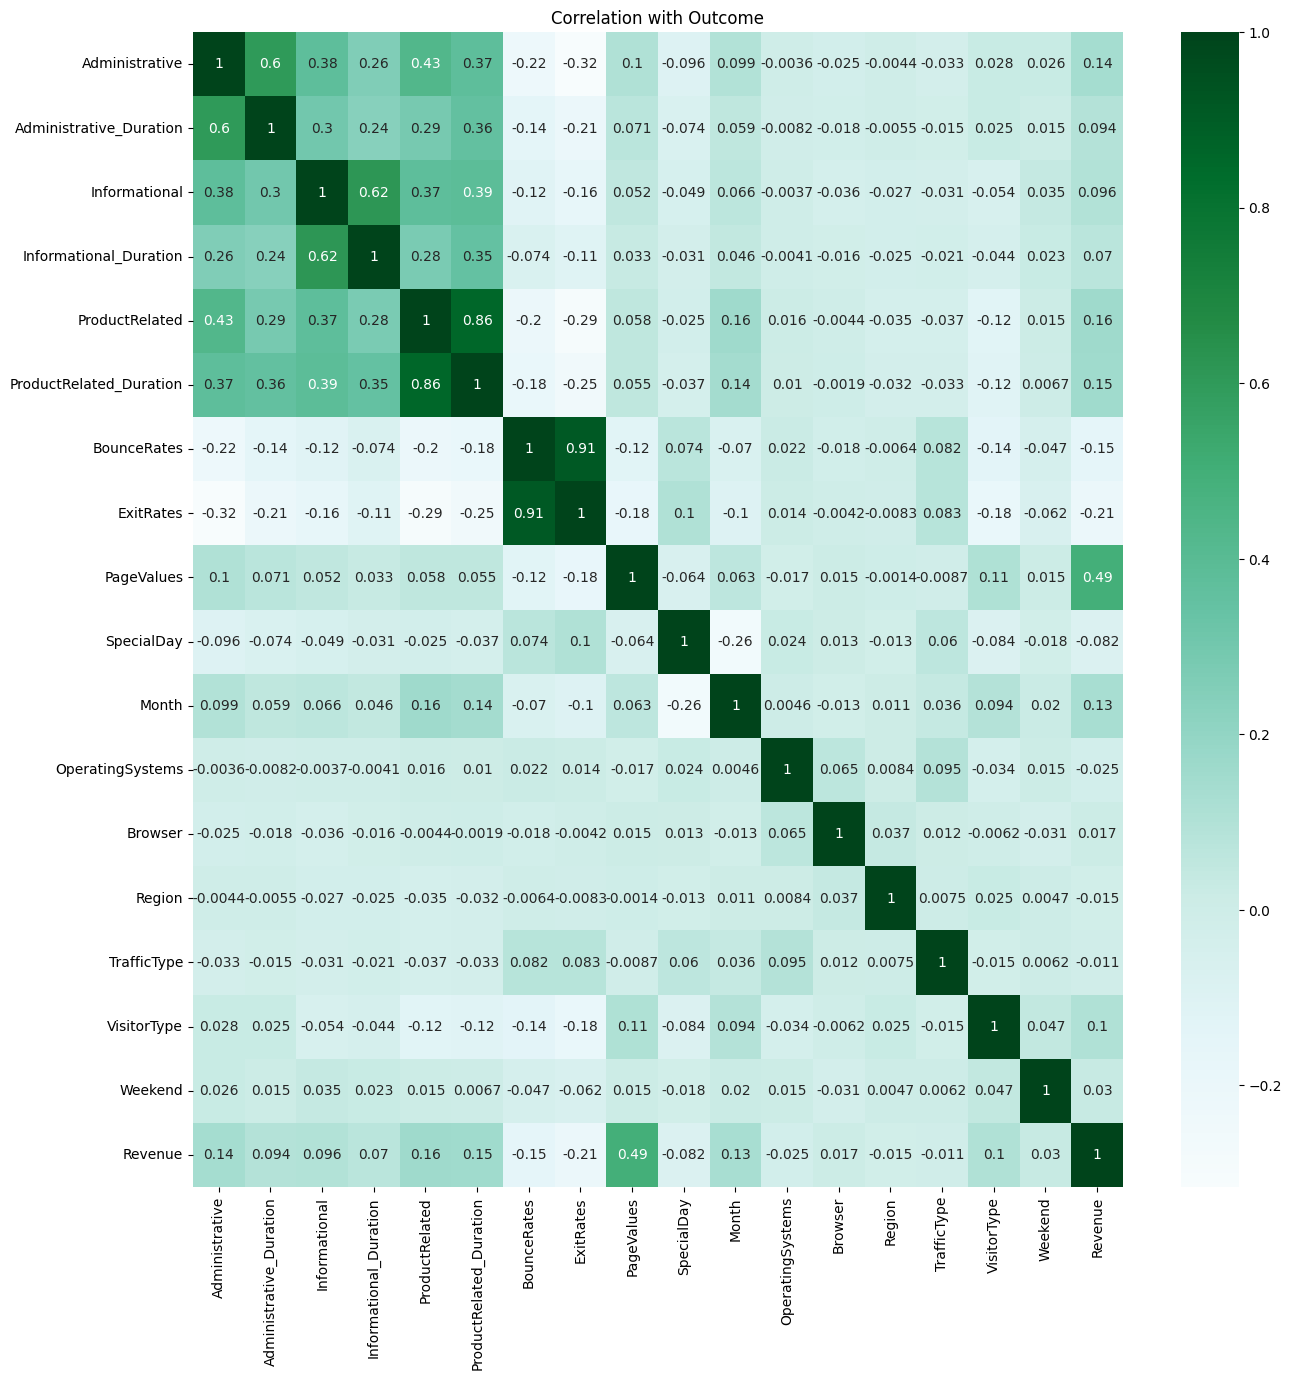

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(exp_df.corr(), annot=True, cmap='BuGn')
plt.title('Correlation with Outcome')
plt.show()

In [ ]:
exp_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
temp_df = exp_df

In [ ]:
temp_df = temp_df.drop(columns = ['Administrative_Duration', 'Informational',
                                'Informational_Duration', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'])

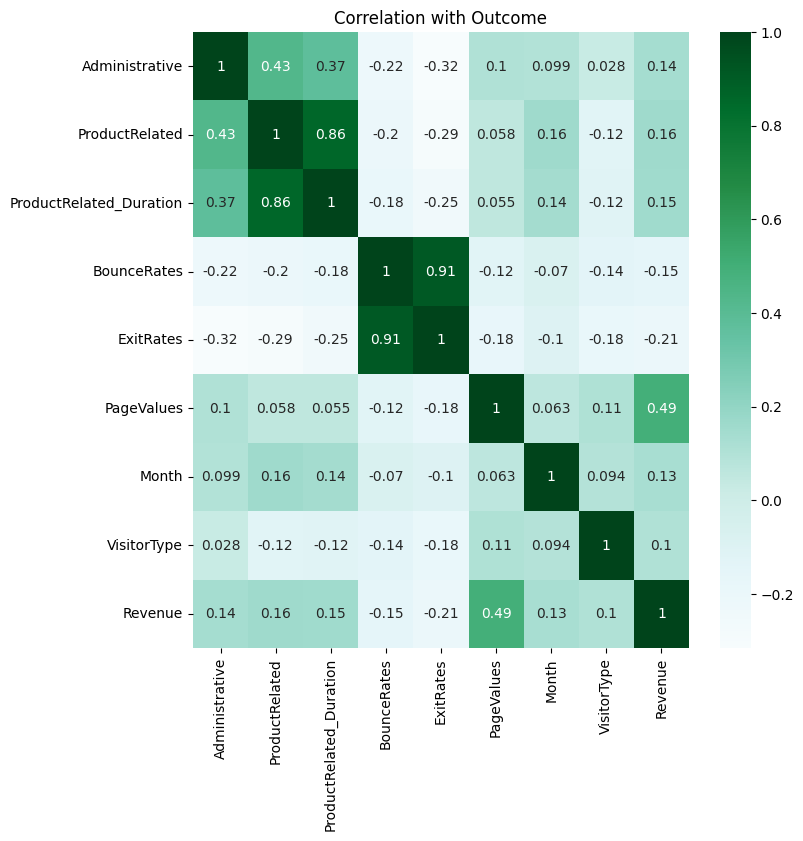

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(temp_df.corr(), annot=True, cmap='BuGn')
plt.title('Correlation with Outcome')
plt.show()

### Machine Learning Modeling

In [ ]:
from imblearn.combine import SMOTEENN

x = temp_df.drop(columns = ['Revenue'])
y = temp_df['Revenue']

smote_enn = SMOTEENN(random_state=42)
x, y = smote_enn.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def modelling(model, title = "Default"):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy', title, ':', accuracy_score(y_test, y_pred))
    print('F1-Score', title, ':', f1_score(y_test, y_pred), '\n')

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

In [ ]:
import lightgbm as lgb
# Naive Bayes
gnb = GaussianNB()
modelling(gnb, "Gaussian Naive Bayes")
mnb = MultinomialNB()
modelling(mnb, "Multinomial Naive Bayes")
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
modelling(knn, "KNN")
# Decission trees
dtc = DecisionTreeClassifier()
modelling(dtc, "Decission trees")
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
modelling(rf, "Random Forest")
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
modelling(lg, "Logistic Regression")
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
modelling(xgb, "Cross Gradient Booster")
# Gradient Boosting
gb = GradientBoostingClassifier()
modelling(gb, "Gradient Boosting")
# Light Gradient Boosting
lgb = lgb.LGBMClassifier(random_state=42)
modelling(lgb)

Accuracy Gaussian Naive Bayes : 0.9043557721596102
F1-Score Gaussian Naive Bayes : 0.9090382387022016 

Accuracy Multinomial Naive Bayes : 0.8632348461772769
F1-Score Multinomial Naive Bayes : 0.8581358609794628 

Accuracy KNN : 0.9323789217179409
F1-Score KNN : 0.9384017758046614 

Accuracy Decission trees : 0.9576606762107828
F1-Score Decission trees : 0.961421038023869 

Accuracy Random Forest : 0.9607066707279927
F1-Score Random Forest : 0.9637334832724206 

Accuracy Logistic Regression : 0.9198903441973805
F1-Score Logistic Regression : 0.9229868228404099 

Accuracy Cross Gradient Booster : 0.9734998477002741
F1-Score Cross Gradient Booster : 0.9758266185051404 

Accuracy Gradient Boosting : 0.9604020712762718
F1-Score Gradient Boosting : 0.963256076879593 

[LightGBM] [Info] Number of positive: 7050, number of negative: 6081
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002972 seconds.
You can set `force_col_wise=true` to remove the overh

##### Top 4 F1-Score
1. Cross Gradient Booster 97.34% / 97.58%
2. Light Gradient Booster 96,89% / 97.14%
3. Random Forest 96.07% / 96.37%
4. Gradient Boosting 96.04% / 96.32%

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 7050, number of negative: 6081
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 13131, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536897 -> initscore=0.147858
[LightGBM] [Info] Start training from score 0.147858
Accuracy: 0.9689308559244594
f1 score:  0.9689308559244594
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1497
           1       0.97      0.97      0.97      1786

    accuracy                           0.97      3283
   macro avg       0.97      0.97      0.97      3283
weighted avg       0.97      0.97      0.97      3283



In [ ]:
from sklearn.ensemble import StackingClassifier
import lightgbm as lgb

base_models = [
    ('rf', RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.05))
]

meta_model = GradientBoostingClassifier(random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [ ]:
stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.9728906487968322
f1 score:  0.9728906487968322
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1497
           1       0.96      0.99      0.98      1786

    accuracy                           0.97      3283
   macro avg       0.97      0.97      0.97      3283
weighted avg       0.97      0.97      0.97      3283



In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.9728906487968322
f1 score:  0.9728906487968322
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1497
           1       0.96      0.99      0.98      1786

    accuracy                           0.97      3283
   macro avg       0.97      0.97      0.97      3283
weighted avg       0.97      0.97      0.97      3283



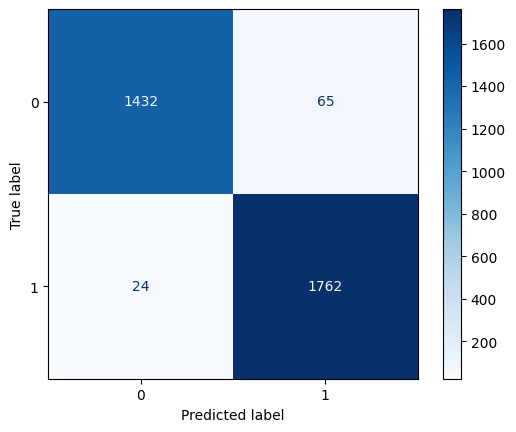

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = make_scorer(f1_score, average='binary')

scores = cross_val_score(stacking_model, x_resampled, y_resampled, cv=kf, scoring=scoring)
print(scores)

[0.97677022 0.96930074 0.96575342 0.96923077 0.96409386]


#####Average -> 96.89%

#### Alternate Combination

In [ ]:
from sklearn.ensemble import StackingClassifier
import lightgbm as lgb

base_models = [
    ('rf', RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.05))
]

meta_model = GradientBoostingClassifier(random_state=42)

stacking_model1 = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
modelling(stacking_model)

Accuracy Default : 0.9728906487968322
F1-Score Default : 0.9753667312482701 



In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
stacking_model1.fit(x_train, y_train)
y_pred = stacking_model1.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.9721658451725138
f1 score:  0.9721658451725138
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1710
           1       0.96      0.98      0.97      1739

    accuracy                           0.97      3449
   macro avg       0.97      0.97      0.97      3449
weighted avg       0.97      0.97      0.97      3449



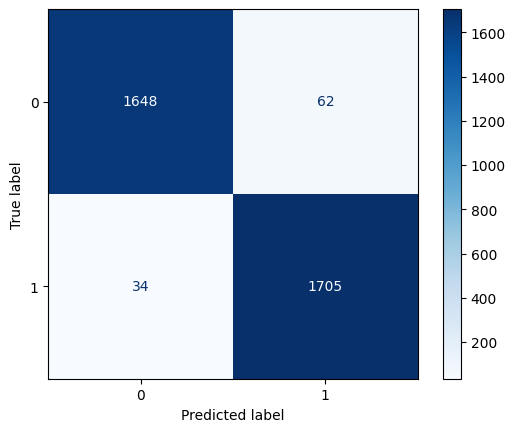

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(stacking_model1, x_resampled, y_resampled, cv=kf)
print(scores)

[0.97471825 0.96710326 0.96344807 0.96710326 0.96130408]
